In [4]:
#Loading in libraries
library(tidyverse)
library(tidymodels)

**Section 1)**
In players dataset, there are 197 observations, and 7 variables. For summary statistics of this dataset's quantitative variables, the mean for played_hours is 5.846, and the mean value for Age is 21.14. 

- experience: Character datatype, describes the level of skill in Minecraft each player has with 5 categories: amateur/beginner/regular/veteran/pro

- subscribe: Logical datatype, states if the individual player is subscribed to the gaming newsletter: True/False

- hashedEmail: Character datatype, states the player's hashed email address to make information secure and private

- played_hours: Double datatype, amount of hours each player has played in Minecraft

- name: Character datatype, states the player's first name 

- gender: Character datatype, states the player's gender: Male/Female/Non-binary/Two-Spirited/Other/Prefer not to say

- Age: Integer datatype, the player's age as a whole number

Some issues that can be seen in in the dataset are that there are missing entries marked by 'NA' and that there are some extreme values in the 'played_hours' variable which skew the data. For other issues, there could be issues with the scale of the data for this varible due to some extreme values. 
The data is collected through players playing the PLAICraft Minecraft game, where the player's gameplay, speech, and key presses are recorded. Each player is given a certain amount of time in their slot and must interact and play with others in order to increase this time (PLAICraft.ai website).

**Section 2)**
Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific question: Can age predict the number of hours played from the players dataset?

The data will help me address this question as both of these variables exist in the data set, each player’s age and number of hours playing the game with the game is in the data. I will plot a graph and visualize the possible correlation between these two variables, to see if an increase in age leads to an increase in played hours. The data from players is already tidy as each variable has its own column, each row is its own set of measurements, and each cell contains a single value. To wrangle this data for the visualizations, I will select the relevant columns: Age and played_hours. For the 2 NA values in Age, I will remove these rows as it will not significantly impact the visualization. 


In [6]:
#Initial loading in players and sessisons datasets
players <- read.csv("data/players.csv")
players

sessions <- read.csv("data/sessions.csv")
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [6]:
#Summary statistics for players dataset
psummary <- summary(players)
psummary

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [4]:
#Selecting specific relevant variables in the dataset, hours and age
selectedPlayer <- select(players, played_hours, Age)
selectedPlayer

played_hours,Age
<dbl>,<int>
30.3,9
3.8,17
0.0,17
0.7,21
0.1,21
0.0,17
0.0,19
0.0,21
0.1,47


In [8]:
player_recipe <- recipe(~ played_hours, age, data = selectedPlayer) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) |>
    prep()

player_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

predictor: 1



── Training information 

Training data contained 196 data points and no incomplete rows.



── Operations 

• Scaling for: played_hours | Trained

• Centering for: played_hours | Trained



In [6]:
scaled_players <- bake(player_recipe, players)
scaled_players

played_hours
<dbl>
0.86235447
-0.07214775
-0.20615184
-0.18146687
-0.20262541
-0.20615184
-0.20615184
-0.20615184
-0.20262541


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


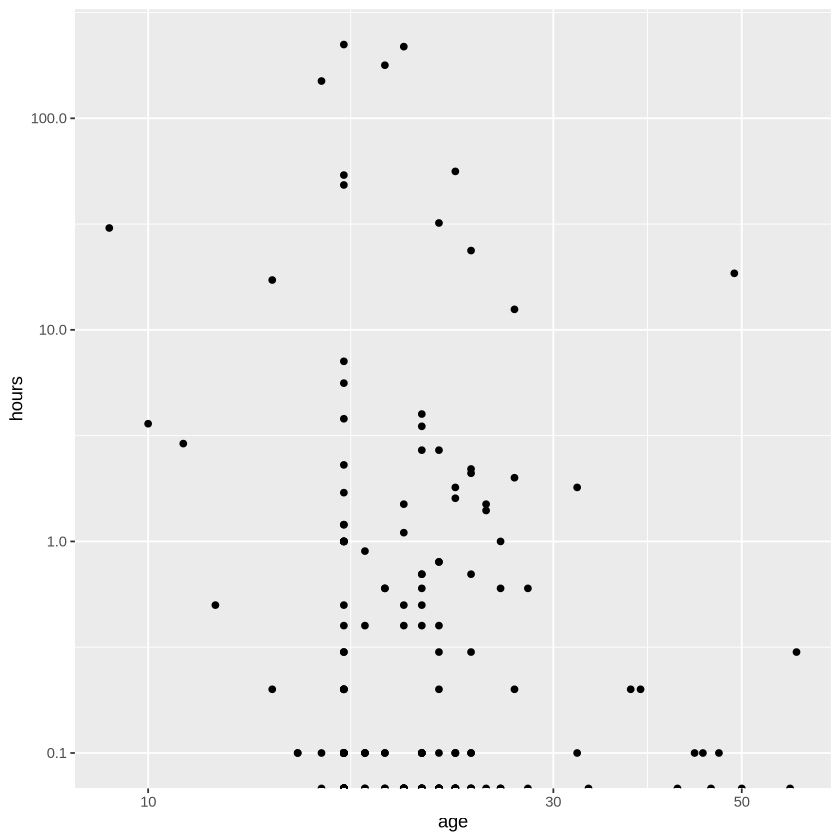

In [9]:
p1player <- ggplot(players, aes(x = Age, y = played_hours))+
            geom_point() +
            xlab("age") +
            ylab("hours") +
  scale_x_log10() +
  scale_y_log10()

p1player